In [1]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle

In [2]:
base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'

In [3]:
with open(base_path + "CNN_input.pkl", "rb") as input_file:
    CNN_input = pickle.load(input_file)
print("Read cnn inputs from pickle file")

with open(base_path + "CNN_classes.pkl", "rb") as input_file:
    CNN_classes = pickle.load(input_file)
print("Read cnn classes from pickle file")


Read cnn inputs from pickle file
Read cnn classes from pickle file


In [4]:
#prepare for CNN 
Y_ = np.zeros((CNN_classes.shape[0],1))
Y_[np.where(CNN_classes == 1)] = 1

X_ = CNN_input.reshape(CNN_input.shape[0],12,1)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import models

Using TensorFlow backend.


In [6]:
#now one-hot encode
Y_OHC = to_categorical(Y_)

In [7]:
#make train, test data
trainX, testX, trainY, testY = train_test_split(X_, Y_OHC, test_size=0.20, random_state=42)

In [8]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainY.shape[1]

In [9]:
n_outputs

2

In [211]:
testY[1829], testX[1829]

(array([0., 1.], dtype=float32), array([[ 8.9773024],
        [16.5997312],
        [13.4636224],
        [12.8073152],
        [12.064704 ],
        [13.6296832],
        [15.0730432],
        [15.6085248],
        [12.4899744],
        [12.4899744],
        [10.6231296],
        [10.6231296]]))

In [61]:
#try an easy 1D conv 
model = Sequential()
model.add(Conv1D(8,4, activation = 'relu',  input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5)) 
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
        

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 9, 8)              40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 8)              0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 8)              0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [62]:
#model fitting
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split = 0.2)

Train on 25372 samples, validate on 6344 samples
Epoch 1/10
25372/25372 [==============================] - 3s 99us/step - loss: 0.2155 - accuracy: 0.9585 - val_loss: 0.1666 - val_accuracy: 0.9683
Epoch 2/10
25372/25372 [==============================] - 2s 76us/step - loss: 0.1487 - accuracy: 0.9715 - val_loss: 0.1556 - val_accuracy: 0.9683
Epoch 3/10
25372/25372 [==============================] - 2s 75us/step - loss: 0.1404 - accuracy: 0.9716 - val_loss: 0.1444 - val_accuracy: 0.9683
Epoch 4/10
25372/25372 [==============================] - 2s 74us/step - loss: 0.1366 - accuracy: 0.9716 - val_loss: 0.1437 - val_accuracy: 0.9683
Epoch 5/10
25372/25372 [==============================] - 2s 76us/step - loss: 0.1332 - accuracy: 0.9716 - val_loss: 0.1415 - val_accuracy: 0.9683
Epoch 6/10
25372/25372 [==============================] - 2s 75us/step - loss: 0.1314 - accuracy: 0.9715 - val_loss: 0.1405 - val_accuracy: 0.9683
Epoch 7/10
25372/25372 [==============================] - 2s 75us/ste

In [64]:
model.evaluate(testX,testY,verbose=1)

7929/7929 [==============================] - 0s 24us/step


[0.1393667744055178, 0.9682179093360901]

Text(0, 0.5, 'True Positives')

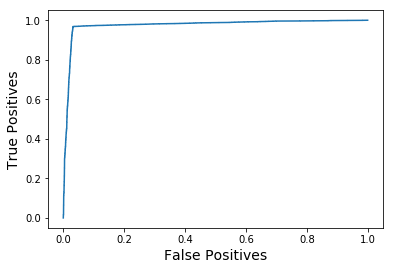

In [65]:
#plot ROC curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
y_pred_keras = model.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testY.ravel(), y_pred_keras)

plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False Positives',fontsize=14)
plt.ylabel('True Positives',fontsize=14)

In [207]:
idx1, val1 = np.where(testY == [0,1])
idx2, val2 = np.where(testY == [1,0])
idx1

array([   7,    7,   15,   15,   84,   84,   90,   90,   91,   91,  124,
        124,  154,  154,  210,  210,  251,  251,  271,  271,  344,  344,
        346,  346,  349,  349,  353,  353,  365,  365,  393,  393,  402,
        402,  438,  438,  595,  595,  660,  660,  669,  669,  693,  693,
        719,  719,  759,  759,  761,  761,  776,  776,  786,  786,  789,
        789,  793,  793,  848,  848,  850,  850,  896,  896,  922,  922,
        950,  950,  960,  960,  977,  977,  982,  982, 1038, 1038, 1121,
       1121, 1134, 1134, 1181, 1181, 1347, 1347, 1353, 1353, 1364, 1364,
       1373, 1373, 1449, 1449, 1462, 1462, 1468, 1468, 1492, 1492, 1537,
       1537, 1538, 1538, 1566, 1566, 1597, 1597, 1601, 1601, 1608, 1608,
       1633, 1633, 1703, 1703, 1720, 1720, 1728, 1728, 1778, 1778, 1819,
       1819, 1825, 1825, 1829, 1829, 1830, 1830, 1893, 1893, 1895, 1895,
       1908, 1908, 1924, 1924, 1928, 1928, 1934, 1934, 1958, 1958, 1986,
       1986, 1987, 1987, 2054, 2054, 2075, 2075, 20

In [167]:
#plot some activations 
layer_outputs = [layer.output for layer in model.layers[:-1]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activation_0 = activation_model.predict(testX[idx1])
activation_1 = activation_model.predict(testX[idx2])

4

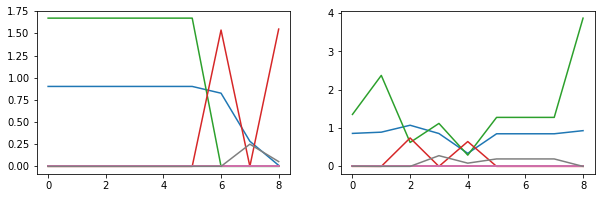

In [204]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].plot(activation_0[0][1,:,:])        
ax[1].plot(activation_1[0][1,:,:])

In [185]:
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

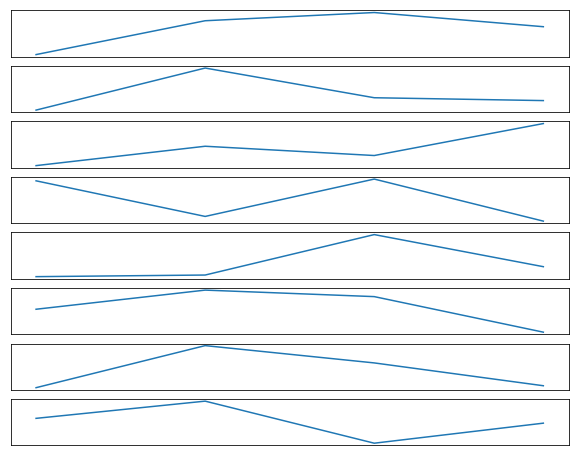

In [186]:
fig, ax = plt.subplots(8,1, figsize = (10,8))
n_filters = 8
for i in range(0,n_filters):
    # get the filter
    f = filters[:, :, i]
    # plot each channel separately    
    # specify subplot and turn of axis
    ax[i].plot(f)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    # plot filter channel in grayscale
    # show the figure
plt.show()

(array([0.02629695, 0.03395177, 0.03837309, 0.03616243, 0.03540355,
        0.03784517, 0.03774619, 0.03975888, 0.04553299, 0.04718273,
        0.05279187, 0.05784009, 0.06849745, 0.07799999, 0.08803045,
        0.10317511, 0.1129746 , 0.12254313, 0.09726902, 0.06335025,
        0.02929949, 0.00986548, 0.00376142, 0.00135279, 0.0006599 ,
        0.0006269 , 0.00026396, 0.00023096, 0.00036294, 0.00019797]),
 array([2.45843478e-04, 7.88052149e-01, 1.57585845e+00, 2.36366476e+00,
        3.15147107e+00, 3.93927737e+00, 4.72708368e+00, 5.51488998e+00,
        6.30269629e+00, 7.09050259e+00, 7.87830890e+00, 8.66611521e+00,
        9.45392151e+00, 1.02417278e+01, 1.10295341e+01, 1.18173404e+01,
        1.26051467e+01, 1.33929530e+01, 1.41807593e+01, 1.49685657e+01,
        1.57563720e+01, 1.65441783e+01, 1.73319846e+01, 1.81197909e+01,
        1.89075972e+01, 1.96954035e+01, 2.04832098e+01, 2.12710161e+01,
        2.20588224e+01, 2.28466287e+01, 2.36344350e+01]),
 <a list of 30 Patch objects

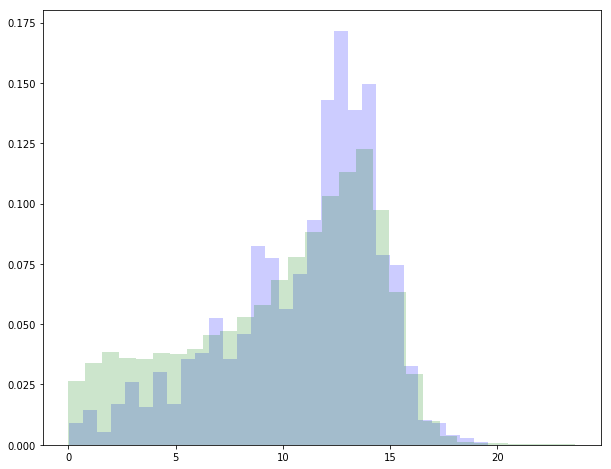

In [130]:
fig = plt.figure(figsize = (10,8))
plt.hist(CNN_input[np.where(CNN_classes == 1)].mean(axis=1), color = 'b', alpha = 0.2, density= True, bins = 30)
plt.hist(CNN_input[np.where(CNN_classes == 0)].mean(axis=1), color = 'g', alpha = 0.2, density= True, bins = 30)

In [145]:
rng = randrange(len(idx1))

In [146]:
rng

251